In [24]:
import numpy as np
import pandas as pd
import sympy as sym

In [25]:
def Motor_Failure_Risk_Calc(MotorStatus, Motors_Configuration, Lamdba, time):

    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    # Program Name : Markov-based Drone's Reliability and MTTF Estimator      %
    # Author       : Koorosh Aslansefat                                       %
    # Version      : 1.0.2                                                    %
    # Description  : A Markov Process-Based Approach for Reliability          %
    #                Evaluation of the Propulsion System for Drones           %
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

    ## Cite As: Aslansefat, Koorosh, Marques, F., Mendonça, R., & Barata, J. 
    # (2019, May). A Markov Process-Based Approach for Reliability Evaluation 
    #  of the Propulsion System in Multi-rotor Drones. In Doctoral Conference
    #  on Computing, Electrical and Industrial Systems (pp. 91-98). Springer

    ##

    # Motors Status 0 for failed and 1 for operational
    # For Example for Hexacopter MotorStatus can be:
    # MotorStatus = [1,1,1,1,1,1] means all motors are operational and MotorStatus = [0,1,1,1,1,1] means motor a has failed.
    # Lambda = Failure Rate of Propulsion System including rotors, motors' drivers and propellers.
    # Motors_Configuration: It can be 'PNPN' for quadcopters, 'PNPNPN' and 'PPNNPN' for hexacopters and 'PPNNPPNN' for octacopter.

    ##
    import numpy as np # linear algebra
    import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
    import sympy as sym

    L = sym.Symbol('L')
    t = sym.Symbol('t')
    
    SysState = sum(MotorStatus)

    if  Motors_Configuration == 'PNPN':
        if len(MotorStatus) > 4:
               disp('The MotorStatus vector should match Motors_Configuration vector') 
        else:
            if SysState < 4:
                P_Fail = 1
                MTTF = 0
            else:
                P_Fail = 1 - sym.exp(-4*L*t)
                MTTF = 1/(4*L)  
                
    elif Motors_Configuration == 'PNPNPN':
        
        if SysState == 6:
            P0 = sym.Matrix([[1],[0],[0],[0],[0],[0]])
            Sflag = 4
        elif SysState == 5:
            P0 = sym.Matrix([[0],[1],[0],[0],[0],[0]])
            Sflag = 3
        elif SysState == 4:
            if (MotorStatus[0]+MotorStatus[3]) == 0 or (MotorStatus[1]+MotorStatus[4]) == 0 or (MotorStatus[2]+MotorStatus[5]) == 0:
                P0 = sym.Matrix([[0],[0],[1],[0],[0],[0]])
                Sflag = 2
            else:
                P0 = sym.Matrix([[0],[0],[0],[1],[0],[0]])
                Sflag = 1

        elif SysState == 3:
            if (MotorStatus[0]+MotorStatus[3]) == 0 or (MotorStatus[1]+MotorStatus[4]) == 0 or (MotorStatus[2]+MotorStatus[5]) == 0:
                P_Fail = 1
                MTTF = 0; 
            else:
                P0 = sym.Matrix([[0],[0],[0],[0],[1],[0]])
                Sflag = 0
        else:
            P_Fail = 1
            MTTF = 0

        M = sym.Matrix([[-6*L,     0,    0,    0,    0,    0],
                            [ 6*L,  -5*L,    0,    0,    0,    0],
                            [   0,     L, -4*L,    0,    0,    0],
                            [   0,   2*L,    0, -4*L,    0,    0],
                            [   0,     0,    0,    L, -3*L,    0],
                            [   0,   2*L,  4*L,  3*L,  3*L,    0]])


        P = sym.exp(M*t)*P0
        P_Fail = P[-1]
        
        N = sym.Matrix([[-6*L,     0,    0,    0,    0],
                            [ 6*L,  -5*L,    0,    0,    0],
                            [   0,     L, -4*L,    0,    0],
                            [   0,   2*L,    0, -4*L,    0],
                            [   0,     0,    0,    L, -3*L]])
        tt = -1*N.inv()
        MTTF = sum(tt[Sflag,:])
    
    elif  Motors_Configuration == 'PPNNPN':
        
        if SysState == 6:
            P02 = sym.Matrix([[1],[0],[0],[0]])
            Sflag = 2
        elif SysState == 5:
            P02 = sym.Matrix([[0],[1],[0],[0]])
            Sflag = 1
        elif SysState == 4:
            P02 = sym.Matrix([[0],[0],[1],[0]])
            Sflag = 0
        else:
            P_Fail = 1
            MTTF = 0

        M2 = sym.Matrix([[-6*L,     0,    0,    0],
                         [  4*L,  -5*L,    0,    0],
                         [    0,   2*L, -4*L,    0],
                         [  2*L,   3*L,  4*L,    0]])
        P2 = sym.exp(M2*t)*P02
        P_Fail = P2[-1]

        N2 = sym.Matrix([[-6*L,     0,    0],
                          [4*L,  -5*L,    0],
                          [  0,   2*L, -4*L]])
            
        tt = -1*N2.inv()
        MTTF = sum(tt[Sflag,:])
        
    elif Motors_Configuration == 'PPNNPPNN':

        if SysState == 8:
            P03 = sym.Matrix([[1],[0],[0],[0],[0],[0]])
            Sflag = 4
        elif SysState == 7:
            P03 = sym.Matrix([[0],[1],[0],[0],[0],[0]])
            Sflag = 3
        elif SysState == 6:
            P03 = sym.Matrix([[0],[0],[1],[0],[0],[0]])
            Sflag = 2
        elif SysState == 5:
            P03 = sym.Matrix([[0],[0],[0],[1],[0],[0]])
            Sflag = 1
        elif SysState == 4: 
            P03 = sym.Matrix([[0],[0],[0],[0],[1],[0]])
            Sflag = 0
        else:
            P_Fail = 1
            MTTF = 0
            

        M3 = sym.Matrix([[-8*L,     0,    0,    0,    0,    0],
                         [ 8*L,  -7*L,    0,    0,    0,    0],
                         [   0,   6*L, -6*L,    0,    0,    0],
                         [   0,     0,  4*L, -5*L,    0,    0],
                         [   0,     0,    0,  2*L, -4*L,    0],
                         [   0,   1*L,  2*L,  3*L,  4*L,    0]])

        P3 = sym.exp(M3*t)*P03
        P_Fail = P3[-1]

        N3 = sym.Matrix([[-8*L,     0,    0,    0,    0],
                         [ 8*L,  -7*L,    0,    0,    0],
                         [   0,   6*L, -6*L,    0,    0],
                         [   0,     0,  4*L, -5*L,    0],
                         [   0,     0,    0,  2*L, -4*L]])
        
        tt = -1*N3.inv()
        MTTF = sum(tt[Sflag,:])

    else:
        print('The current Motors_Configuration is not defined in this version, please check the updated versions')

    return P_Fail.evalf(subs={L: Lamdba, t: time}), MTTF.evalf(subs={L: Lamdba, t: time})

In [26]:
P_Fail, MTTF = Motor_Failure_Risk_Calc([1,1,1,1,1,1], 'PNPNPN', 0.001, 100)

print(P_Fail)

print(MTTF)

0.0489641066173940
483.333333333333


In [27]:
P_Fail, MTTF = Motor_Failure_Risk_Calc([0,1,1,1,1,1], 'PNPNPN', 0.001, 100)

print(P_Fail)

print(MTTF)

0.195392392995276
450.000000000000


In [28]:
P_Fail, MTTF = Motor_Failure_Risk_Calc([0,1,1,0,1,1], 'PNPNPN', 0.001, 100)

print(P_Fail)

print(MTTF)

0.329679953964361
350.000000000000


In [29]:
P_Fail, MTTF = Motor_Failure_Risk_Calc([1,1,1,1,1,1], 'PPNNPN', 0.001, 100)

print(P_Fail)

print(MTTF)

0.196030818613950
416.666666666667


In [30]:
P_Fail, MTTF = Motor_Failure_Risk_Calc([1,1,1,1,1,1], 'PPNNPPNN', 0.001, 100)

print(P_Fail)

print(MTTF)

0.196030818613950
452.380952380952


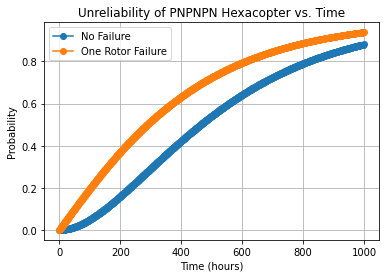

In [32]:
import matplotlib.pyplot as plt

P_Fail2 = np.zeros(1000)
P_Fail3 = np.zeros(1000)
MTTF2 = np.zeros(1000)
MTTF3 = np.zeros(1000)

for ii in range(1000):
    P_Fail2[ii], MTTF2[ii] = Motor_Failure_Risk_Calc([1,1,1,1,1,1], 'PNPNPN', 0.001, ii)
    P_Fail3[ii], MTTF3[ii] = Motor_Failure_Risk_Calc([0,1,1,1,1,1], 'PNPNPN', 0.001, ii)

time = list(range(1000))    
plt.plot(time,P_Fail2, label='No Failure',marker='o')
plt.plot(time,P_Fail3, label='One Rotor Failure',marker='o')

plt.xlabel('Time (hours)')
plt.ylabel('Probability')
plt.legend()
plt.title('Unreliability of PNPNPN Hexacopter vs. Time')
plt.grid()
plt.show()